# Regression

## Polynomial regression

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load data from source

In [2]:
df = pd.read_csv('/tmp/TvMarketing.csv')
df.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [24]:
df.isna().sum()

TV       0
Sales    0
dtype: int64

In [4]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


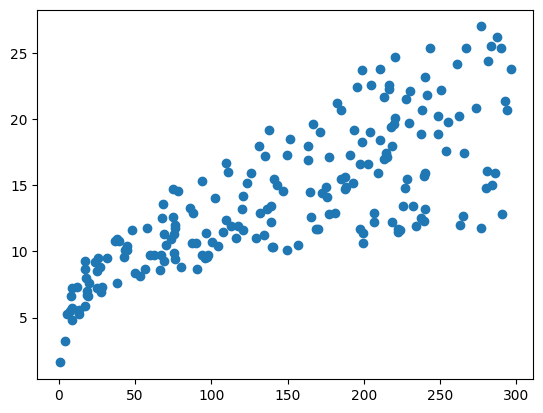

In [5]:
# plot the data
plt.scatter(df['TV'], df['Sales'])

### Data Preprocessing

In [14]:
df_new = df.sort_values('TV')

In [15]:
# split the data into X and Y
X = df_new.drop('Sales', axis=1)
Y = df_new['Sales']

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# add polynomial features
poly = PolynomialFeatures(degree=5)
poly.fit(X)
X_new = poly.transform(X)

### model building

In [19]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()
model.fit(X_new, Y)

LinearRegression()

### model evaluation

In [20]:
# define y_true and y_pred
y_true = Y
y_pred = model.predict(X_new)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [22]:
print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 2.4955588052215405
mse = 10.050136212344306
rmse = 3.170194980177766
r2 = 0.6289510708989002


### result visualiation

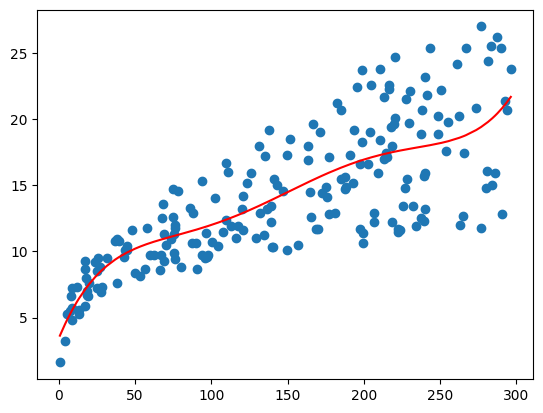

In [23]:
plt.scatter(X['TV'], Y)
plt.plot(X['TV'], y_pred, color="red")